# Concrete Strength Case Study

**Attribute information**

    - Cement -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Blast Furnace Slag -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Fly Ash  -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Water -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Superplasticizer -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Coarse Aggregate -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Fine Aggregate -- quantitative -- kg in a m3 mixture -- Input Variable
    
    - Age -- quantitative -- Day (1~365) -- Input Variable
    
    - Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable

## 1. Importing the Libraries

In [167]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Sciket learn libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importing libraries from SciPy

from scipy import stats
from scipy.stats import zscore


## 2.Loading and Understanding the dataset

In [168]:
data = pd.read_csv(r'C:\Users\akjaiswal\Desktop\ML\Projects\06.  Concrete Strength Prediction\concrete.csv')

In [169]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [170]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


### We can observe that all the variables are numeric in nature with 8 Independent variable ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and 1 dependent variable (strength).

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [172]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [173]:
data.shape

(1030, 9)

In [174]:
#Checking Missing values

data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### We have 1030 rows and 9 columns with no nulls in the provided dataset.

In [175]:
#5 Point Summary

data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### We can observe that cement, slag, ash are left skewed.

## 3. Exploratory Data Analysis

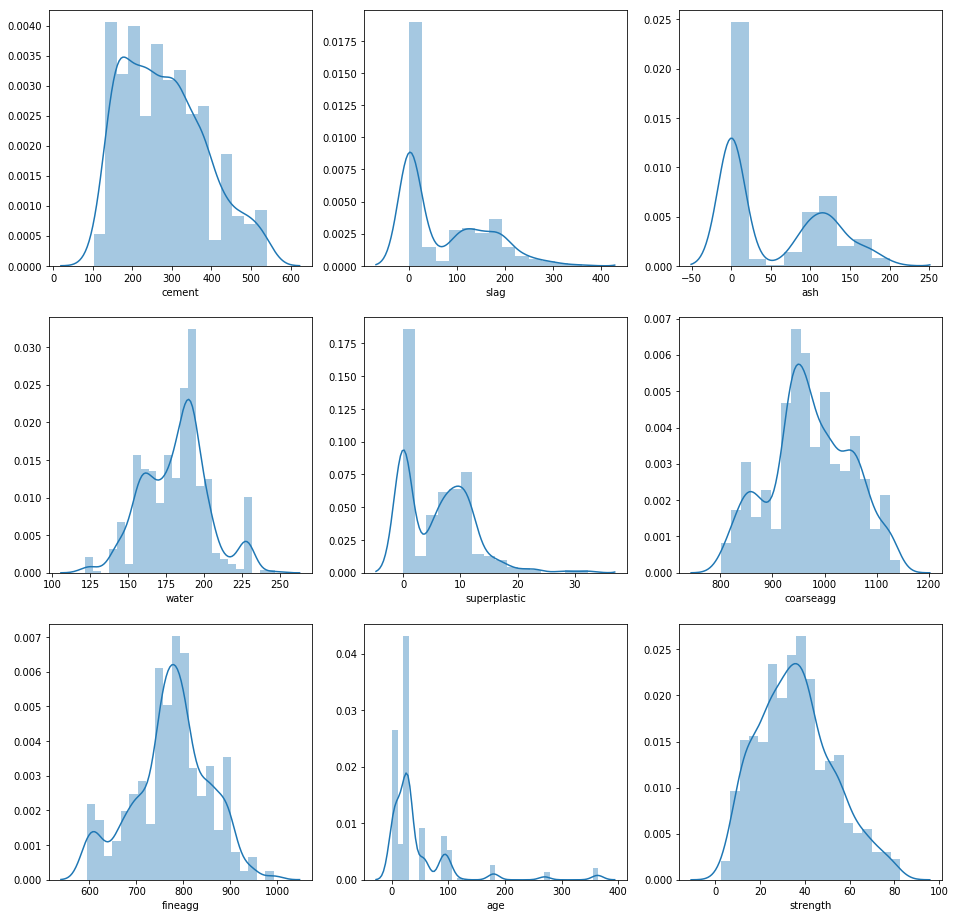

In [176]:
# Distplot

fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(data['cement'],ax=ax2[0][0])
sns.distplot(data['slag'],ax=ax2[0][1])
sns.distplot(data['ash'],ax=ax2[0][2])
sns.distplot(data['water'],ax=ax2[1][0])
sns.distplot(data['superplastic'],ax=ax2[1][1])
sns.distplot(data['coarseagg'],ax=ax2[1][2])
sns.distplot(data['fineagg'],ax=ax2[2][0])
sns.distplot(data['age'],ax=ax2[2][1])
sns.distplot(data['strength'],ax=ax2[2][2])

**We can see observe that :**

Cement is almost normal.

Slag has three gausssians and rightly skewed.

Ash has two gaussians and rightly skewed.

Water has three guassians and slighly left skewed.

Superplastic has two gaussians and rightly skewed.

Coarseagg has three guassians and almost normal.

Fineagg has almost two guassians and looks like normal.

Age has multiple guassians and rightly skewed.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F6FDD2828>,
      dtype=object)

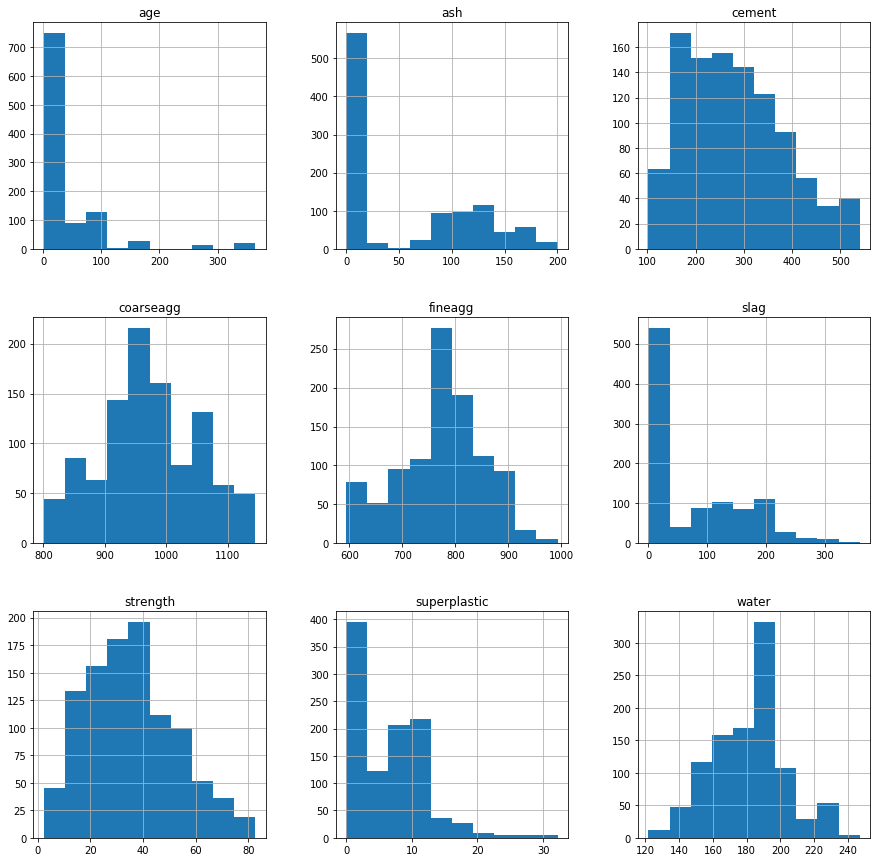

In [177]:
# Histogram 

data.hist(figsize=(15,15))

**Provides similar information to 5 point summary and Dist plot**

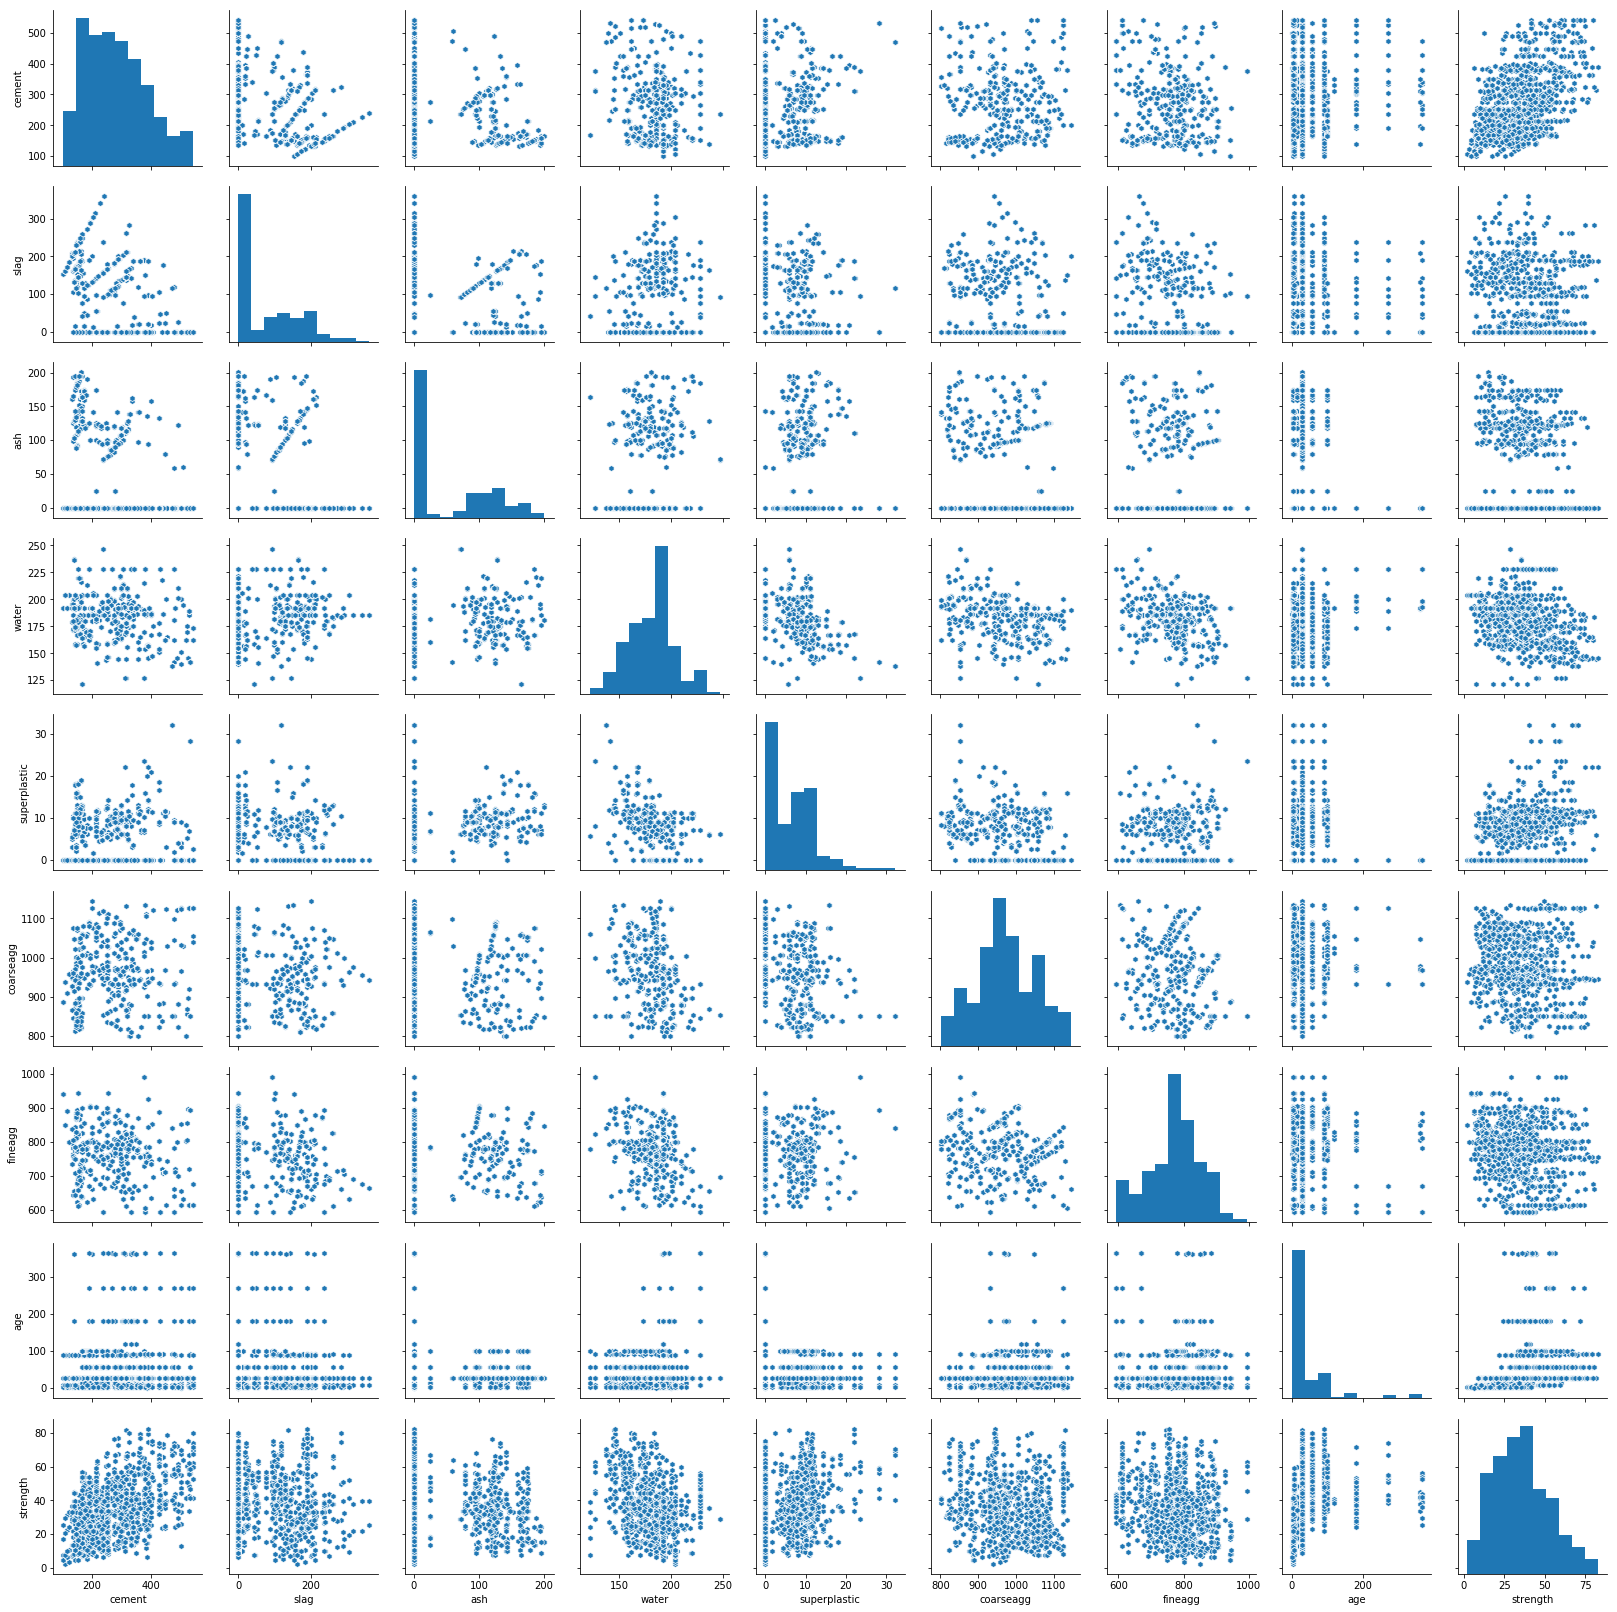

In [178]:
#Pair plot between variables

sns.pairplot(data,markers="h")
plt.show()

**Diagonals Analysis:**
The diagonal gives the same information, we got using distplot.

    -cement attribute have almost normal curve.
    
    -slag has two gausssians and rightly skewed.It shows the presence of outlies.
    
    -ash has two gaussians and rightly skewed.It shows the presence of outlies.
    
    -water has atleast guassians and slighly left skewed.It shows the presence of outlies.
    
    -superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
    
    -coarseagg has three guassians and almost normal.
    
    -fineagg has almost two guassians and looks like normal.
    
    -age has multiple guassians and rightly skewed. It shows the presence of outlies.
    
    -strength is close to a normal curve.

**Off Diagonal Analysis**: Relationship between indpendent attributes
    
    - Cement ,slag ,ash ,coarseagg, fineagg  vs other independent attributes: 
    This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
    
    - Water vs other independent attributes: 
    This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
    
    - Superplastic vs other independent attributes:
    This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.


**Strength attribute Analysis**: Relationship between dependent and independent attributes


    -strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know.Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
    
    -strength vs slag: There is no particular trend.
    
    -strength vs slag: There is also no particular trend.
    
    -strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
    
    -strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.

**Other attributes does not give any strong relationship with strength.**
    
**Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.**

**So, we will not use Linear model**

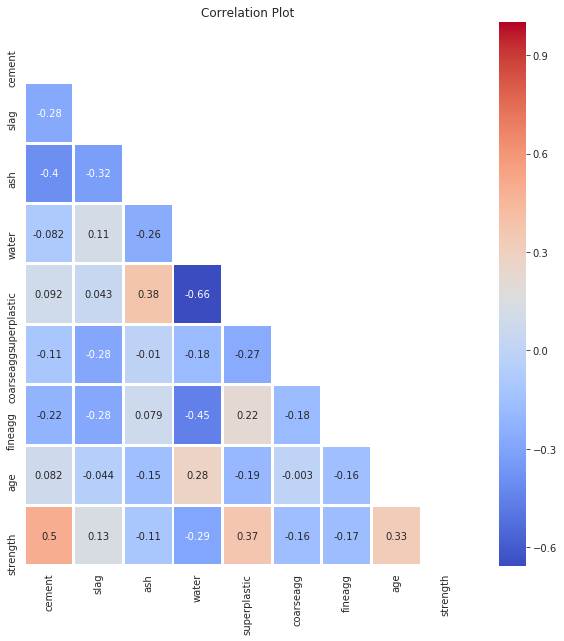

In [179]:
#Correlation plot

cp = data.corr()
mask = np.zeros_like(cp)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = mask,cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

**None of the features are highly inter correlated or correlated with the target variable.**

**It is also giving the same information we observed in pairplot analysis.**

**water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.**

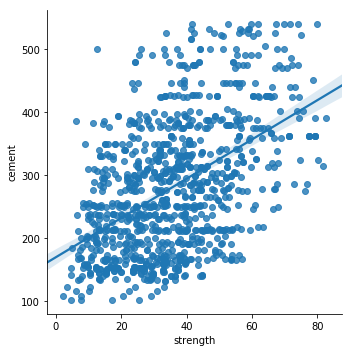

In [180]:
#strength vs cement
sns.lmplot(x="strength",y="cement",data=data)
plt.show()

**As stated earlier, the relationship is positive and we can see that for a given value of cement we have a multiple values of strength. 
but choosing the right value is difficult, hence not a good predictor.**

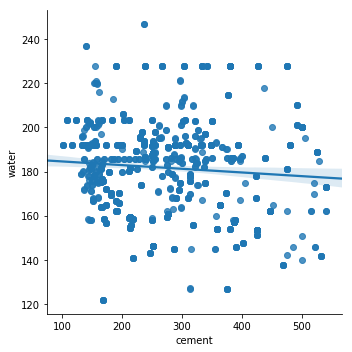

In [181]:
# water vs cement
#lm plot

sns.lmplot(x="cement",y="water",data=data)
plt.show()

## 4. Outlier Detection and Imputation

In [182]:
# Detecting Outliers

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1

cwo = ((data.iloc[:] < (q1 - 1.5*IQR)) | (data.iloc[:] > (q3 + 1.5*IQR))).sum(axis = 0)

OutlierDF = pd.DataFrame(cwo,index=data.columns,columns=['No. of Outliers'])
OutlierDF['Outliers %'] = round(OutlierDF['No. of Outliers']*100/len(data),2)

In [183]:
OutlierDF

,No. of Outliers,Outliers %
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


### We can observe that "Age" column has 59 outliers while the rest are less than 1% overall which would hardly effect our models. We will replace these Outliers with their median values.


In [184]:
#Replacing the outliers by median

for col_name in data.columns[:-1]:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    data.loc[(data[col_name] < low) | (data[col_name] > high), col_name] = data[col_name].median()

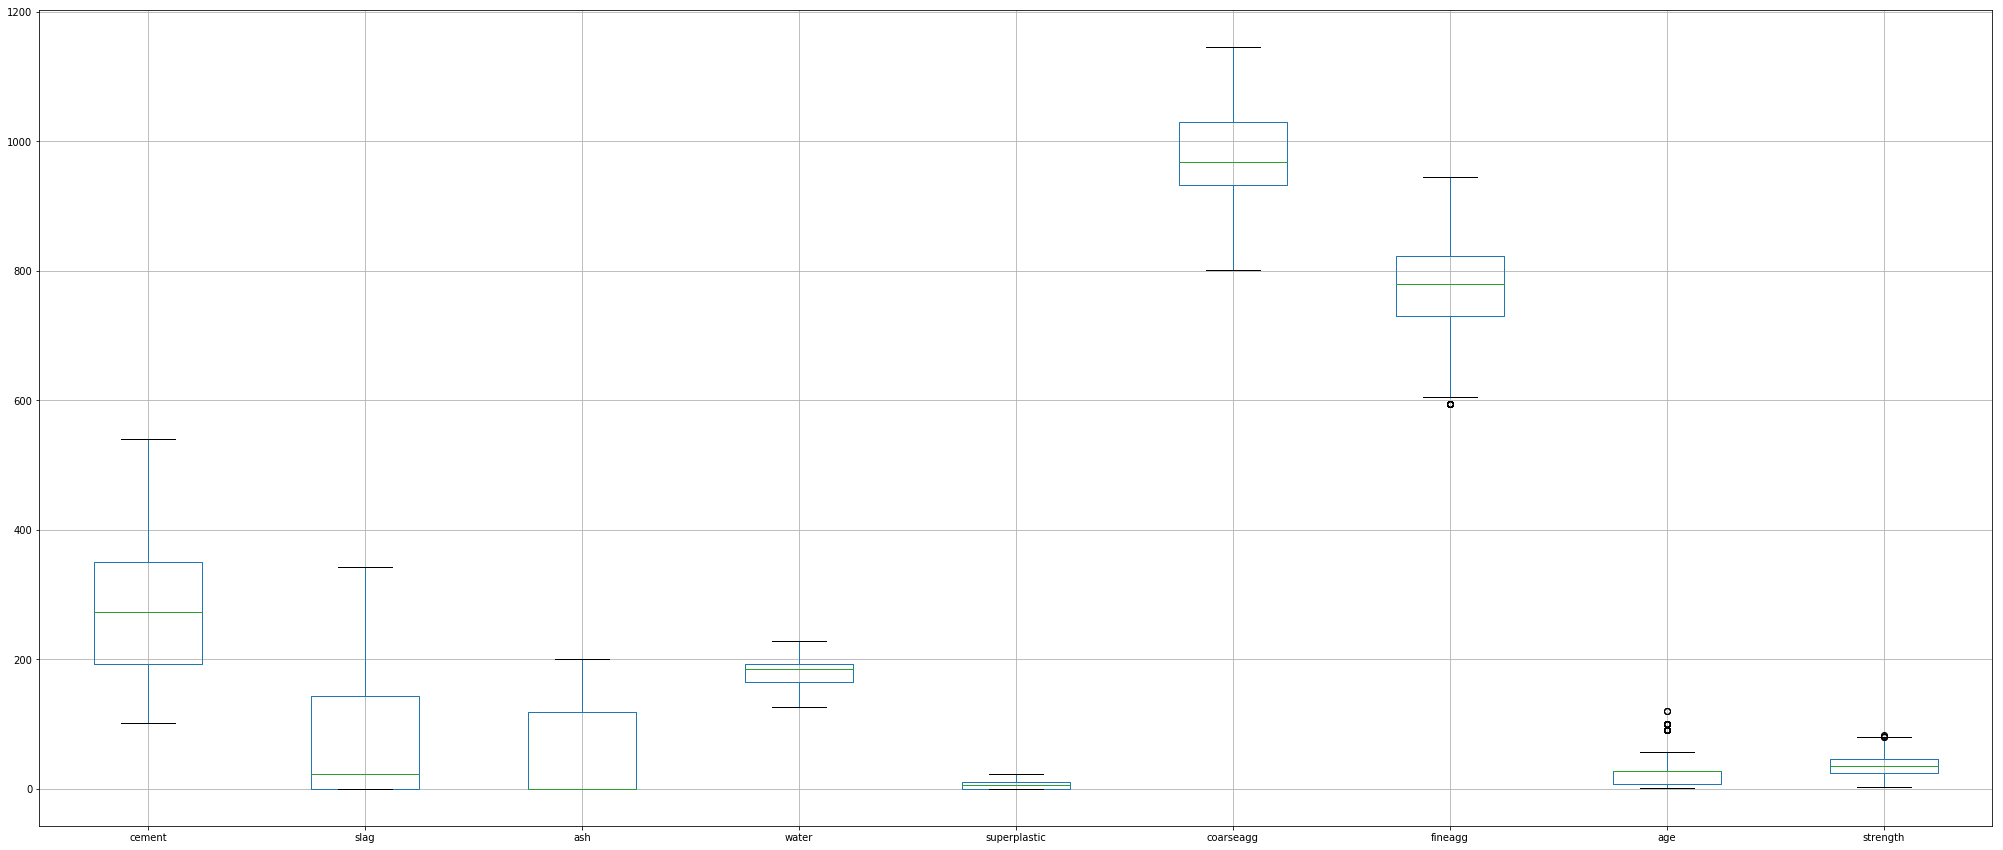

In [185]:
data.boxplot(figsize=(35,15))


## 5.Feature Engineering, Model Building and Model Tuning

In [186]:
#Scaling the dataset

data_z = data.apply(zscore)

data_z = pd.DataFrame(data_z, columns= data.columns)

In [65]:
data_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.049727


**Age and Superplastic columns are now scaled**

In [187]:
#Splitting the independent variable and Dependent Variable

X = data_z.iloc[:,0:8]
y = data_z.iloc[:,8]

In [188]:
#Splitting the dataset into Train and Test

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### 5.1 Decision Tree Regression

In [189]:

dt = DecisionTreeRegressor()
dt.fit(X_Train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [190]:
#Listing down important features as stated by Decision Tree 

print('Important Feature: \n', pd.DataFrame(dt.feature_importances_,columns = ['Important'], index = X_Train.columns))

Important Feature: 
               Important
cement         0.355673
slag           0.093169
ash            0.013163
water          0.125043
superplastic   0.017059
coarseagg      0.033879
fineagg        0.033289
age            0.328726


**Cement, Age, Water are importatnt features for our model**

**Ash, Coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.**

In [191]:

y_pred = dt.predict(X_Test)

#Performance Evaluation

print('Performance on Training Data:', dt.score(X_Train,y_train))
print('Performance on Testing Data:', dt.score(X_Test,y_test))

acc_DT = metrics.r2_score(y_test,y_pred)
print('Model Accuracy DT:',acc_DT)
print('MSE:', metrics.mean_squared_error(y_test,y_pred))


Performance on Training Data: 0.9917907393004437
Performance on Testing Data: 0.8443616873768651
Model Accuracy DT: 0.844361687376865
MSE: 0.16246463879573592


**Model might be overfitting on Training Data as accuracy is 99% and the same drops to 82% while predicting in test data**

In [192]:
#Store the accuracy results for each model in a dataframe for final comparison
results_model = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362


### 5.2 Decision Tree Regression with KFold

In [194]:
#K Fold Cross Validation

folds = 10
seed = 77

kfold = KFold(n_splits=folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt,X,y,cv = kfold)
accuracy = np.mean(abs(results1))

print('Average Accuracy:', accuracy)
print('Standard Deviation:', results1.std())

Average Accuracy: 0.8478030177979882
Standard Deviation: 0.045062180412857075


In [195]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803


### 5.3 Decision Tree Regression with only Significant Columns

**Performing Iteration 2 by dropping least significant Columns**

In [196]:
#Creating a copy of the data

data_d = data_z.copy()

In [197]:
X = data_d.drop(['strength','ash','coarseagg','fineagg'] , axis=1)
y = data_d['strength']

In [198]:
#Splitting the dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [199]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [200]:
#printing the feature importance

print('Feature importances: \n',pd.DataFrame(dt.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.371638
slag          0.108283
water         0.160027
superplastic  0.031106
age           0.328946


**Cement and Age are still important features**

In [201]:
y_pred = dt.predict(X_test)

# performance on train data
print('Performance on training data using DT:',dt.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8445377803696659
Accuracy DT:  0.8445377803696659


**Again, the model is overfitting on Training Data**

In [202]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538


### 5.4 Random Forest Regression

In [203]:
#independent and dependent variables

X=data_z.iloc[:,0:8]
y = data_z.iloc[:,8]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [204]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [205]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9792562271159458
Performance on testing data using RFR: 0.9047124109736234
Accuracy DT:  0.9047124109736234
MSE:  0.09946692091408364


**This model is also fitting on Training Data**

In [206]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'4'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712


### 5.5 Random Forest Regression with KFold

In [207]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9019709775802276
Standard Deviation:  0.024201749163773673


In [208]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'5'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971


### 5.6 Gradient Boosting Regression

In [209]:
#Gradient Boosting Regressor

model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [210]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8916753376672497
Accuracy DT:  0.8916753376672497
MSE:  0.11307580275028203


In [211]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'6'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675


### 5.7 Gradient Boosting Regression with KFold

In [212]:
#Applying K-Fold

folds = 10
seed = 77

kfold = KFold(n_splits=folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt,X,y,cv = kfold)
accuracy = np.mean(abs(results1))

print('Average Accuracy:', accuracy)
print('Standard Deviation:', results1.std())

Average Accuracy: 0.8569680984595756
Standard Deviation: 0.03787205765993507


In [213]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'7'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675
7,Gradient Boost Regressor k fold,0.856968


### 5.8 Bagging Regression

In [214]:
#Bagging Regressor

model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [215]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9739227135514692
Performance on testing data using GBR: 0.8838490320023777
Accuracy DT:  0.8838490320023777
MSE:  0.12124537167915661


In [216]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'8'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675
7,Gradient Boost Regressor k fold,0.856968
8,Bagging Regressor,0.883849


### 5.9 Bagging Regression with KFold

In [217]:
#Applying KFold 

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True )
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8881718656083264
Standard Deviation:  0.022480903939606913


In [218]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'9'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675
7,Gradient Boost Regressor k fold,0.856968
8,Bagging Regressor,0.883849
9,Bagging Regressor k fold,0.888172


### 5.10 Ensemble Model

In [219]:
## Ensemeble KNN Regressor, SVR, LR

from sklearn import svm

LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [220]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [221]:
y_pred = evc.predict(X_test)

# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)

print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894734
Accuracy ensemble:  0.7849191766894734
MSE:  0.22451430937603256


In [222]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'10'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675
7,Gradient Boost Regressor k fold,0.856968
8,Bagging Regressor,0.883849
9,Bagging Regressor k fold,0.888172
10,Ensemble,0.784919


### 5.11 XGBoost Regression

In [223]:
#XGBoost Regressor

from xgboost import XGBRegressor


model=XGBRegressor()
model.fit(X_train, y_train)

C:\Users\akjaiswal\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [224]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_XG=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_XG)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.940546682264095
Performance on testing data using GBR: 0.8944243969051316
Accuracy DT:  0.8944243969051318
MSE:  0.11020616924820177


**Here we have achieved a model which performs well with both test and train data. This is very lightly overfit. It can be further adjusted**



In [225]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['XG Boost Regressor'], 'accuracy': [acc_XG]},index={'11'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.844362
2,Decision Tree k fold,0.847803
3,Decision Tree2,0.844538
4,Random Forest Regressor,0.904712
5,Random Forest Regressor k fold,0.901971
6,Gradient Boost Regressor,0.891675
7,Gradient Boost Regressor k fold,0.856968
8,Bagging Regressor,0.883849
9,Bagging Regressor k fold,0.888172
10,Ensemble,0.784919
